In [75]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [76]:
# To partition the data
from sklearn.model_selection import train_test_split

In [77]:
# Importing library for logistic regression
from sklearn.linear_model import LogisticRegression

In [78]:
# Importing Performance metrics - accuracy score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix

In [79]:
# Importing the data
data_income = pd.read_csv(r'C:\Users\Sharan Babu\Desktop\swayam\Python for Data Science\income.csv')

In [80]:
# Create a copy
data = data_income.copy()

<b>1) Getting to know the data<br>
2) Data preprocessing (Missing Values)<br>
3) Cross tables and data visualization<br>


In [82]:
#STEP 1.
print(data.info())
# It is found that data types of columns are satisfactory(expected data_types)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
age              31978 non-null int64
JobType          31978 non-null object
EdType           31978 non-null object
maritalstatus    31978 non-null object
occupation       31978 non-null object
relationship     31978 non-null object
race             31978 non-null object
gender           31978 non-null object
capitalgain      31978 non-null int64
capitalloss      31978 non-null int64
hoursperweek     31978 non-null int64
nativecountry    31978 non-null object
SalStat          31978 non-null object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [83]:
data.isnull().sum()
# No missing values!!

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [84]:
# Let us look at descriptive statistics of the numerical data.
summary_num = data.describe()
print(summary_num)

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [85]:
## Summary of categorical Variables
summary_cate = data.describe(include="O")
print(summary_cate)

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [86]:
# frequency of each category
data['JobType'].value_counts()
# '?' (missing values) exists

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [87]:
data['occupation'].value_counts()
# '?' (missing values) exists

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [88]:
# Checking for unique classes
print(np.unique(data['JobType']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']


In [89]:
print(np.unique(data['occupation']))

[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [90]:
# Consider the dataframe again with '?' as nan values
data = pd.read_csv(r'C:\Users\Sharan Babu\Desktop\swayam\Python for Data Science\income.csv',na_values=[" ?"])

In [91]:
# Data pre-processing
data.isnull().sum()
# Two columns have missing values

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [92]:
missing = data[data.isnull().any(axis=1)]
missing
# axis=1 to consider at least one column value is missing ( Sub-setting the dataFrame).

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
57,72,NaN,HS-grad,Married-civ-spouse,NaN,Husband,White,Male,0,0,20,United-States,"less than or equal to 50,000"
69,53,NaN,5th-6th,Widowed,NaN,Unmarried,Black,Female,0,0,30,United-States,"less than or equal to 50,000"
73,57,NaN,Assoc-voc,Widowed,NaN,Unmarried,White,Female,0,0,38,United-States,"less than or equal to 50,000"
75,20,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,24,United-States,"less than or equal to 50,000"
76,21,NaN,Some-college,Never-married,NaN,Unmarried,White,Female,0,0,35,United-States,"less than or equal to 50,000"


In [93]:
# Check shape of DataFrame that is a sub-set
missing.shape

(1816, 13)

In [97]:
# Drop records with null values
data2 = data.dropna(axis=0)

In [95]:
# Relationship between independent variables using correlation (Numerical Variables)
correlation = data2.corr()

In [96]:
correlation
# Closer the correlation value is to 1, stronger the relationship between the two variables.
# Here, none of the values have corr values near 1.

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [494]:
# Cross tables and Data Visualization

In [495]:
# List of columns of data frame
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [496]:
# Gender Proportion Table
gender = pd.crosstab(index = data2['gender'],
                    columns='count',
                    normalize = True)

In [497]:
gender # Percentage returned

col_0,count
gender,
Female,0.324315
Male,0.675685


In [498]:
# Gender vs Salary Status:

In [499]:
gender_salstat = pd.crosstab( index = data2['gender'],
                            columns = data2['SalStat'],
                            margins = True,
                            normalize = 'index')

In [500]:
gender_salstat
#Hence from o/p it is clear that percentage of males earning more than 50,000 dollars is higher than that of females.

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


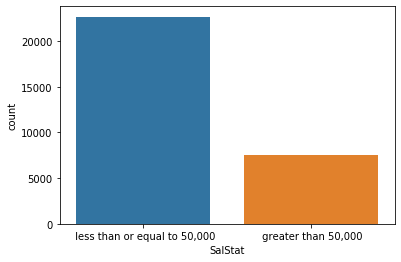

In [501]:
# fREQUENCy distribution of 'Salary Status'
Salstat = sns.countplot(data2['SalStat'])

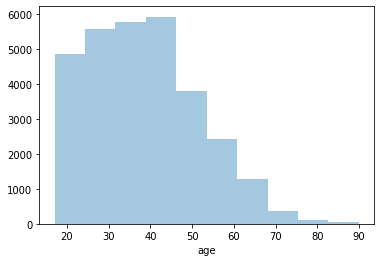

In [502]:
# Histogram of Age
sns.distplot(data2['age'], bins=10, kde=False)
# To get frequency values kde to be set to False.
# people with age 20-45 are high in frequency as interpretable from the hist...

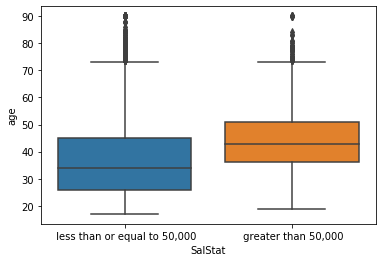

In [503]:
# Box Plot - Age vs salary Status
sns.boxplot('SalStat','age',data=data2)
#data2.groupby('SalStat')['age'].median()

SalStat
 greater than 50,000             43
 less than or equal to 50,000    34
Name: age, dtype: int64

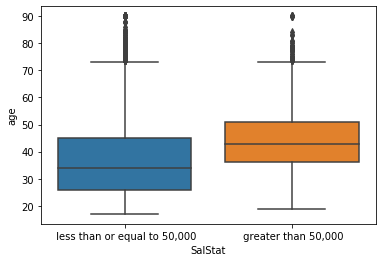

In [504]:
sns.boxplot('SalStat','age',data=data2)
data2.groupby('SalStat')['age'].median()

In [505]:
## People with 35-50 age are more likely to earn > 50000 Us Dollars
## People with 25-35 age are more likely to earn < 50000 Us Dollars

In [506]:
# JOB TYPE VS SALARY STATUS using cross table
jobtype_salstat = pd.crosstab( index = data2['JobType'],
                            columns = data2['SalStat'],
                            margins = True,
                            normalize = 'index')

In [507]:
# In terms of Percentage
jobtype_salstat * 100

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,38.706257,61.293743
Local-gov,29.462990,70.537010
Private,21.879207,78.120793
Self-emp-inc,55.865922,44.134078
Self-emp-not-inc,28.571429,71.428571
State-gov,26.896013,73.103987
Without-pay,0.000000,100.000000
All,24.892249,75.107751


In [508]:
# IMPORTANT RELATION TO NOTICE:
# 56% SELF EMPLOYED PEOPLE EARN MORE THAN 50,000 USD PER YEAR.
# HENCE AN IMPORTNAT VARIABLE IN AVOIDING THE MISUSE OF SUBSIDIES.

In [100]:
# EdType VS SALARY STATUS using cross table
edtype_salstat = pd.crosstab( index = data2['EdType'],
                            columns = data2['SalStat'],
                            margins = True,
                            normalize = 'index')

In [101]:
edtype_salstat *100

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,7.195122,92.804878
11th,5.629771,94.370229
12th,7.692308,92.307692
1st-4th,3.973510,96.026490
5th-6th,4.166667,95.833333
7th-8th,6.283662,93.716338
9th,5.494505,94.505495
Assoc-acdm,25.396825,74.603175
Assoc-voc,26.319816,73.680184


In [511]:
# From the above tale we can see that people who have done Doctorate, Masters, Prof-School are more likely to earn
# above 50000 USD per year when compared with others. Hence an influencing variable in avoiding the misuse of subsidies.

In [512]:
# occupation VS SALARY STATUS using cross table
occupation_salstat = pd.crosstab( index = data2['occupation'],
                            columns = data2['SalStat'],
                            margins = True,
                            normalize = 'index')

In [513]:
occupation_salstat * 100

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,13.383499,86.616501
Armed-Forces,11.111111,88.888889
Craft-repair,22.531017,77.468983
Exec-managerial,48.522044,51.477956
Farming-fishing,11.627907,88.372093
Handlers-cleaners,6.148148,93.851852
Machine-op-inspct,12.461851,87.538149
Other-service,4.109589,95.890411
Priv-house-serv,0.699301,99.300699


In [514]:
# From above table, records to watch out for are managers and professionals.

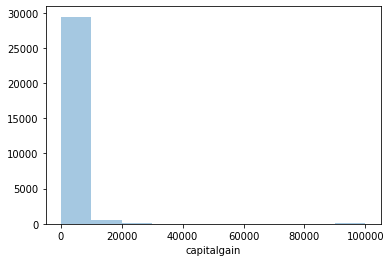

In [515]:
sns.distplot(data2['capitalgain'], bins=10, kde=False)
# 92% (27611) of the capitalgain is 0.

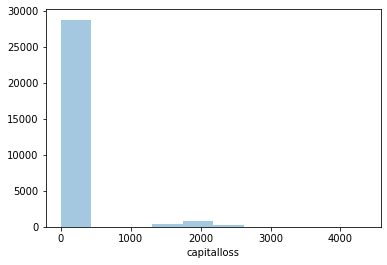

In [516]:
sns.distplot(data2['capitalloss'], bins=10, kde=False)
# 95% capital loss is 0


SalStat
 greater than 50,000             40
 less than or equal to 50,000    40
Name: hoursperweek, dtype: int64

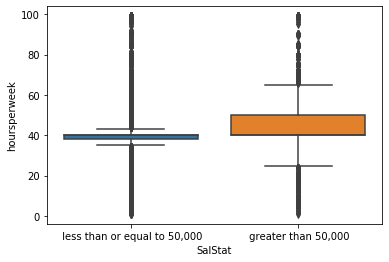

In [104]:
sns.boxplot('SalStat','hoursperweek',data=data2)
data2.groupby('SalStat')['hoursperweek'].median()
# From the plot, those who work 40-50 hours per week are likely to earn > 50000 USD.

In [105]:
# Summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
age              31978 non-null int64
JobType          30169 non-null object
EdType           31978 non-null object
maritalstatus    31978 non-null object
occupation       30162 non-null object
relationship     31978 non-null object
race             31978 non-null object
gender           31978 non-null object
capitalgain      31978 non-null int64
capitalloss      31978 non-null int64
hoursperweek     31978 non-null int64
nativecountry    31978 non-null object
SalStat          31978 non-null object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [106]:
hoursperweek_salstat = pd.crosstab( index = data2['hoursperweek'],
                            columns = data2['SalStat'],
                            margins = True,
                            normalize = 'index')
(hoursperweek_salstat * 100).head(10)

SalStat,"greater than 50,000","less than or equal to 50,000"
hoursperweek,,
1,14.285714,85.714286
2,13.333333,86.666667
3,4.166667,95.833333
4,7.407407,92.592593
5,15.789474,84.210526
6,10.000000,90.000000
7,10.526316,89.473684
8,5.882353,94.117647
9,5.882353,94.117647


In [107]:
print(np.unique(data['SalStat']))

[' greater than 50,000' ' less than or equal to 50,000']


# LOGISTIC REGRESSION

In [109]:
# Machine learning algorithms cannot work with categorical variables. 
# Hence, let us reindex the salary status names to 0,1

In [110]:
data2['SalStat'] = data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
#print(data2['SalStat'])
data2
# This method is called as Intger Encoding. It will later be used to get the labels at the end.

C:\Users\Sharan Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0
5,44,Private,HS-grad,Widowed,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,0
6,51,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,0
7,20,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0
9,19,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,Black,Female,0,0,40,United-States,0
10,45,Self-emp-inc,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,55,United-States,1


In [111]:
# One hot encoding
# It refers to splitting the column which has categorical data to many columns depending on the number of categories
# present in the column.
new_data = pd.get_dummies(data2, drop_first=True)

In [112]:
#Storing the columns
columns_list = list(new_data.columns)
print(columns_list)
#We get this many columns because one-hot encoding dvides each column sub-typee into a separate column.

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [113]:
#Separating the input names from data
features= list(set(columns_list)-set(['SalStat']))
features

['nativecountry_ Hungary',
 'occupation_ Machine-op-inspct',
 'relationship_ Wife',
 'capitalloss',
 'nativecountry_ Vietnam',
 'JobType_ Local-gov',
 'nativecountry_ Honduras',
 'nativecountry_ Peru',
 'EdType_ Prof-school',
 'nativecountry_ England',
 'occupation_ Transport-moving',
 'EdType_ 11th',
 'nativecountry_ Laos',
 'nativecountry_ Portugal',
 'EdType_ Masters',
 'EdType_ Assoc-acdm',
 'EdType_ HS-grad',
 'JobType_ Private',
 'EdType_ 5th-6th',
 'JobType_ Without-pay',
 'occupation_ Armed-Forces',
 'occupation_ Handlers-cleaners',
 'EdType_ Preschool',
 'nativecountry_ El-Salvador',
 'EdType_ Bachelors',
 'nativecountry_ Thailand',
 'nativecountry_ Ireland',
 'relationship_ Unmarried',
 'capitalgain',
 'nativecountry_ Poland',
 'nativecountry_ Guatemala',
 'nativecountry_ Taiwan',
 'nativecountry_ Nicaragua',
 'nativecountry_ Cuba',
 'occupation_ Tech-support',
 'maritalstatus_ Widowed',
 'nativecountry_ China',
 'nativecountry_ Hong',
 'JobType_ State-gov',
 'nativecountry_ 

In [114]:
'SalStat' in features

False

In [115]:
# Storing the output values in y
y = new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [116]:
# Storing the values from input features
x = new_data[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [530]:
x.shape

(30162, 94)

In [531]:
# Splitting the data into train and test
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3, random_state=0)
# test_size represents the proportion of the data set to include in the test split.
# random_state is the seed used by the random number generator, so that same samples are chosen for the analysis each time
# you run this code.

In [433]:
train_x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [434]:
# Make an instance of the model
logistic = LogisticRegression()

In [435]:
# Fitting for the values of x and y
logistic.fit(train_x,train_y)
logistic.coef_

C:\Users\Sharan Babu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[-4.35758548e-01, -2.90268326e-02, -2.65468420e-01,
        -6.19166299e-01, -1.73805775e-01, -7.44679155e-01,
        -9.08947258e-01, -4.72288959e-02, -8.78122709e-01,
        -7.41184154e-02, -9.53387359e-02,  3.07298556e-02,
        -3.49813808e-01, -2.37183698e-02, -5.35872531e-03,
        -9.53453374e-01, -3.83839578e-01, -1.04749907e-01,
        -1.69884944e-01, -1.51052730e-01, -9.92589703e-03,
        -1.39021556e-01, -1.28685771e-02,  3.62366696e-01,
        -1.12840733e+00,  1.18516772e-02, -8.26170280e-02,
        -6.86109804e-01, -1.81820332e-01,  7.02019529e-01,
        -2.18825365e-01, -2.66360880e-03,  6.81147513e-01,
         7.87946714e-01,  3.11615816e-04, -6.85232584e-01,
        -4.54515615e-02, -3.56485926e-01, -5.04653302e-02,
        -2.82887621e-02, -9.24676943e-03,  9.46093184e-04,
        -7.38927136e-01, -8.78494028e-01,  8.50746228e-01,
        -1.03265504e+00, -5.37039206e-02, -7.98102681e-01,
        -6.48097352e-01, -1.74651034e-01,  2.38119697e-0

In [436]:
logistic.intercept_

array([-2.83873439])

In [437]:
# Prediction from test data
prediction = logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [438]:
# Model to be evaluated using confusion matrix.
# Confusion matrix is a table that is used to evaluate the performance of a classification model.
# The confusion matrix output gives you the number of correct predictions and the number of incorrect predictions.
# and it will sum up all the values class wise.

In [439]:
# Confusion matrix
confusion_matrix = confusion_matrix(test_y,prediction)
print(confusion_matrix)

[[6338  485]
 [ 941 1285]]


In [440]:
# The diagonal values gives you the total number of correctly classified samples 
# and the off-diagonal values gives you the total number of wrongly classified samples.

In [441]:
# INTERPRETATION OF CONFUSION MATRIX
#[[6332 491]
#   925 1301]]
# The model has predicted 6332 observations as less than or equal to 50000.(For actual class <=50 )
# But being less than or equal to 50000 is the actual class, the model has predicted 491 observations as > 50000.
# Similarly given the actual salary status is greater than given 50000, the model has predicted 1301 observations
# as >50000 and 925 observations as <=50000. So there are many mis-calculations.

In [442]:
# Calculating the accuracy
accuracy_score = accuracy_score(test_y,prediction)
print(accuracy_score)

0.8424135263565035


In [443]:
# Printing the misclassified values from prediction
print('Misclassified samples: %d'% (test_y != prediction).sum())

Misclassified samples: 1426


# KNN - K Nearest Neighbors

In [532]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [533]:
# Storing the K nearest neighbors classifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 5)

In [534]:
# Fitting the values for x an y
KNN_classifier.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [535]:
# Predicting the test values with model.
prediction = KNN_classifier.predict(test_x)

In [536]:
# Performance metric check
confusion_matrix = confusion_matrix(test_y, prediction)
print("\t","Predicted values")
print("Original values","\n",confusion_matrix)

	 Predicted values
Original values 
 [[6178  645]
 [ 810 1416]]


In [537]:
# Calculating the accuracy
accuracy_score = accuracy_score(test_y, prediction)
print(accuracy_score)

0.8392087523483258


In [538]:
print('Misclassified samples: %d' % (test_y != prediction).sum())

Misclassified samples: 1455


In [539]:
# Effect of K value on classifier

In [542]:
Misclassified_sample = []
# Calculating error for K values between 1 and 20
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    pred_i = knn.predict(test_x)
    Misclassified_sample.append((test_y != pred_i).sum())
print(Misclassified_sample)    

[1767, 1509, 1512, 1432, 1455, 1447, 1457, 1451, 1450, 1444, 1456, 1425, 1447, 1405, 1435, 1405, 1426, 1414, 1444]


In [545]:
min(Misclassified_sample)

1405

In [546]:
Misclassified_sample.index(1405)

13

#### Hence, k=14 will give the best results. Better than the k=5 which we have set.

<h1><b><i> DONE !!!